<a href="https://colab.research.google.com/github/DILSHAN565/FYP_DL_Models/blob/main/Copy_of_Mobilnetv1_with_manual_data_aug_batch_size_change_16_width_multiplier_0_75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os



In [ ]:
pip -q install vit_keras tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
import os

# Define the path to the directory containing your dataset
directory_path = '/content/drive/My Drive/progress/Tea-Leaf-Diseases-Dataset'

# List all files in the directory
files = os.listdir(directory_path)

# Print the list of files
print(files)

['validation', 'train', 'test', 'valid']


In [ ]:
!pip -q install --upgrade --no-cache-dir gdown

In [ ]:
!pip install tensorflow-addons


In [ ]:
!pip install vit-keras


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from vit_keras import vit
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
SEED = 42
np.random.seed(SEED)


In [ ]:
# Insert the Dataset path here
train_path = '/content/drive/MyDrive/progress/Tea-Leaf-Diseases-Dataset/train'
val_path = '/content/drive/MyDrive/progress/Tea-Leaf-Diseases-Dataset/validation'
test_path = '/content/drive/MyDrive/progress/Tea-Leaf-Diseases-Dataset/test'

HEre teh Batch size is changed to 16

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 200
LEARNING_RATE = 1e-4
WIDTH_MULTIPLIER = 0.75

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



import cv2
import random
import warnings
import pandas as pd
from termcolor import colored

from keras.utils import plot_model
from tensorflow.keras import optimizers
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [ ]:
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

# Try

In [ ]:
from vit_keras import vit

train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
).flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=10
)

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    batch_size=10
)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=10,
    shuffle=False
)


Found 725 images belonging to 8 classes.
Found 82 images belonging to 8 classes.
Found 83 images belonging to 8 classes.


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                   rotation_range=360,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   fill_mode='nearest',
                                   brightness_range=[0.8, 1.4],
                                   vertical_flip=True,
                                   horizontal_flip=True)

In [ ]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 725 images belonging to 8 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 82 images belonging to 8 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

Found 83 images belonging to 8 classes.


In [ ]:
def num_of_classes(folder_dir, folder_name) :
    classes = [class_name for class_name in os.listdir(train_path)]
    print(colored(f'number of classes in {folder_name} folder : {len(classes)}', 'blue', attrs=['bold']))

In [ ]:
from termcolor import colored
import os

In [ ]:
num_of_classes(train_path, 'train')
num_of_classes(val_path, 'validation')
num_of_classes(test_path, 'test')

number of classes in train folder : 8
number of classes in validation folder : 8
number of classes in test folder : 8


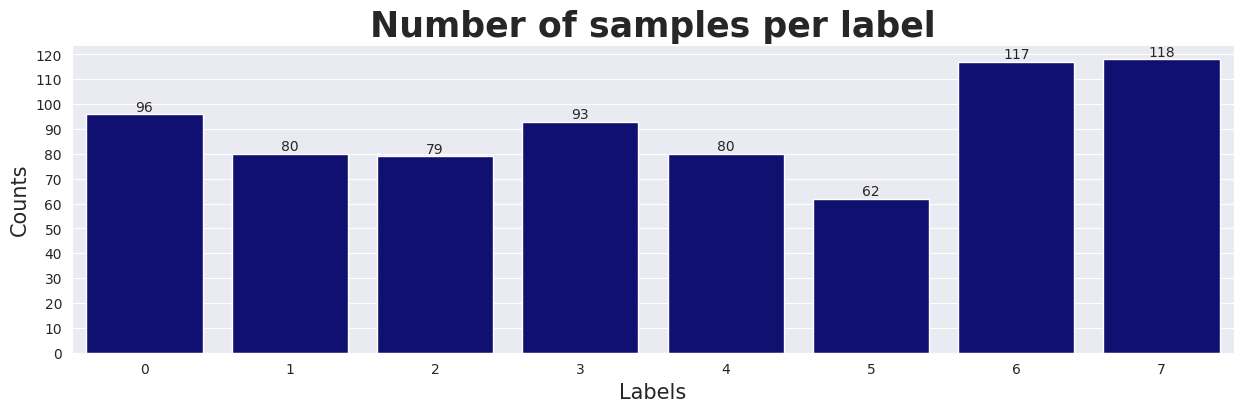

In [ ]:
# Get the class names and the number of samples in each class
classes = [class_name for class_name in os.listdir(train_path)]
count = [len(os.listdir(os.path.join(train_path, class_name))) for class_name in classes]

# Convert class names to integers if they are in string format and sort them
sorted_classes = sorted(classes, key=int)
sorted_count = [count[classes.index(class_name)] for class_name in sorted_classes]

# Plot the sorted class counts
plt.figure(figsize=(15, 4))
ax = sns.barplot(x=sorted_classes, y=sorted_count, color='navy')
plt.xticks(rotation=0)  # No rotation needed if class names are integers
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of samples per label', fontsize=25, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(np.arange(0, max(sorted_count) + 10, 10))
plt.show()

In [ ]:
# A function to return DataFrame

def create_df(folder_path) :
    all_images = []
    for class_name in classes :
        class_path = os.path.join(folder_path, class_name)
        all_images.extend([(os.path.join(class_path, file_name), class_name) for file_name in os.listdir(class_path)])
    df = pd.DataFrame(all_images, columns=['file_path', 'label'])
    return df

In [ ]:
train_df = create_df(train_path)
validation_df = create_df(val_path)
test_df = create_df(test_path)

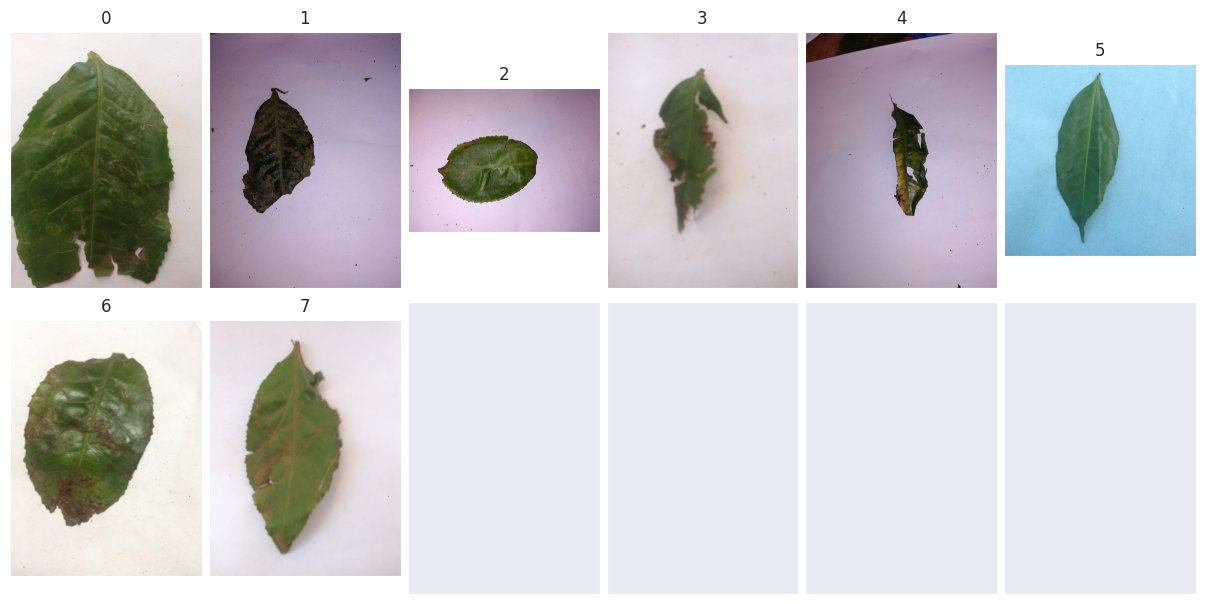

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming train_df is already defined and contains the necessary data
# Ensure the classes are sorted
train_df_sorted = train_df.copy()
train_df_sorted['label'] = train_df_sorted['label'].astype(int)  # Convert labels to integers if needed
train_df_sorted = train_df_sorted.sort_values(by='label').reset_index(drop=True)

# Create a DataFrame with one Label of each category
df_unique = train_df_sorted.drop_duplicates(subset=["label"]).reset_index(drop=True)

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < len(df_unique):  # Check if index is within the DataFrame length
        img = plt.imread(df_unique.file_path[i])
        ax.imshow(img)
        ax.set_title(df_unique.label[i], fontsize=12)
plt.tight_layout(pad=0.5)
plt.show()


In [ ]:
print(colored(f'Number of samples in train : {len(train_df)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples in validation : {len(validation_df)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples test : {len(test_df)}', 'blue', attrs=['bold']))

Number of samples in train : 725
Number of samples in validation : 82
Number of samples test : 83


In [ ]:
# def create_model():
#     vit_model = vit.vit_b16(
#         image_size=IMAGE_SIZE,
#         activation='softmax',
#         pretrained=True,
#         include_top=False,
#         pretrained_top=False)

#     model = tf.keras.Sequential([
#         vit_model,
#         Flatten(),
#         Dense(8, activation='softmax') # Change to 8 for tea leaf disease classification
#     ])


In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet


In [ ]:
# Load the pre-trained MobileNet model
mobile = MobileNet()

In [ ]:
# Take the output from the fifth-to-last layer of MobileNet
x = mobile.layers[-5].output

In [ ]:
# Reshape the output to be 1D tensor with 1024 elements
x = Reshape(target_shape=(1024,))(x)

In [ ]:
# Add a dense layer with 8 units and softmax activation for classification
output = Dense(units=8, activation='softmax')(x)



In [ ]:
# Create a new model with the same input as MobileNet but with the new output layer
model = Model(inputs=mobile.input, outputs=output)


In [ ]:
# Freeze all layers except the last 22 layers
for layer in model.layers[:-22]:
    layer.trainable = False

In [ ]:
# Summary of the model to verify the architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

Frome here the chyange code for width mutiplier

In [ ]:
# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

save_dir = '/content/drive/MyDrive/progress/MobileNet_with_width_multiplier'
os.makedirs(save_dir, exist_ok=True)
weights_dir = os.path.join(save_dir, 'weights')
os.makedirs(weights_dir, exist_ok=True)
logs_dir = os.path.join(save_dir, 'logs')
os.makedirs(logs_dir, exist_ok=True)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(weights_dir, 'MobileNet_weights-{epoch:02d}.h5'),
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)


In [ ]:
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1
)

In [ ]:
csv_logger_callback = CSVLogger(
    os.path.join(logs_dir, 'training_log.csv')
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
callbacks = [
    model_checkpoint_callback,
    reduce_lr_callback,
    csv_logger_callback,
    early_stopping_callback
]

In [ ]:
# Create MobileNetV1 model with width multiplier
base_model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), alpha=WIDTH_MULTIPLIER, include_top=False, pooling='avg')
model = tf.keras.Sequential([
    base_model,
    Dense(8, activation='softmax')  # Change to 8 for tea leaf disease classification
])

10626956/10626956 [==============================] - 1s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/100
45/45 [==============================] - ETA: 0s - loss: 1.2711 - categorical_accuracy: 0.4810
Epoch 1: val_loss improved from inf to 1.56967, saving model to /content/drive/MyDrive/progress/MobileNet_with_width_multiplier/weights/MobileNet_weights-01.h5
45/45 [==============================] - 531s 12s/step - loss: 1.2711 - categorical_accuracy: 0.4810 - val_loss: 1.5697 - val_categorical_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 2/100
45/45 [==============================] - ETA: 0s - loss: 0.7232 - categorical_accuracy: 0.7151
Epoch 2: val_loss improved from 1.56967 to 1.00865, saving model to /content/drive/MyDrive/progress/MobileNet_with_width_multiplier/weights/MobileNet_weights-02.h5
45/45 [==============================] - 127s 3s/step - loss: 0.7232 - categorical_accuracy: 0.7151 - val_loss: 1.0087 - val_categorical_accuracy: 0.6500 - lr: 1.0000e-04
Epoch 3/100
45/45 [==============================] - ETA: 0s - loss: 0.5808 - categorical_accuracy: 0.7786
Epoch 3: val

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history, title):
    plt.title(title)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(0, 1)
    plt.legend(['train_accuracy', 'val_accuracy'], loc='best')
    plt.show()

def plot_loss(history, title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(0, 1)
    plt.legend(['train_loss', 'val_loss'], loc='best')
    plt.show()


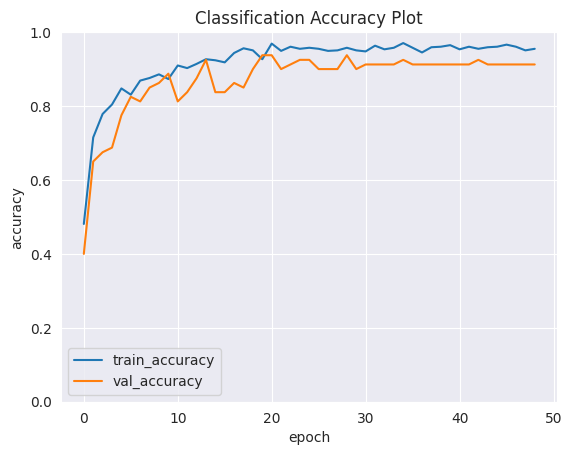

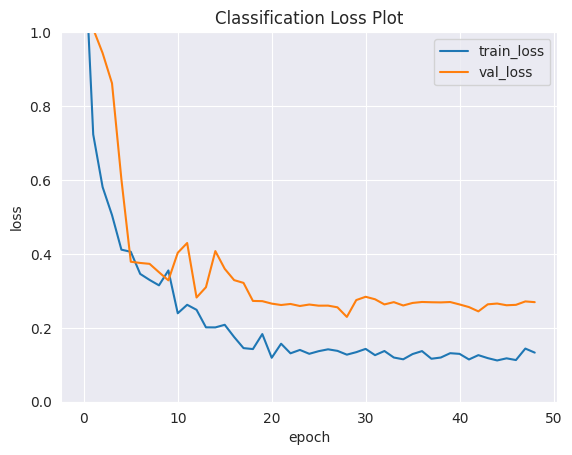

In [ ]:
plot_accuracy(history, 'Classification Accuracy Plot')
plot_loss(history, 'Classification Loss Plot')

In [ ]:
#model = create_model()
model.load_weights('/content/drive/MyDrive/progress/MobileNet_with_width_multiplier/weights/MobileNet_weights-29.h5')


In [ ]:
# Assume the model.predict() call returns a predictions object
predictions = model.predict(test_generator, verbose=0)

# Getting the index of the highest probability class per image
y_pred = np.argmax(predictions, axis=1)

# Getting the true labels per image
y_true = test_generator.classes

# Getting the class names (labels) from the generator
class_names = list(test_generator.class_indices.keys())

# Printing the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.82      0.90      0.86        10
           2       1.00      0.73      0.84        11
           3       1.00      0.80      0.89        10
           4       0.83      1.00      0.91        10
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        12
           7       0.91      0.83      0.87        12

    accuracy                           0.90        83
   macro avg       0.92      0.91      0.90        83
weighted avg       0.92      0.90      0.90        83



In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

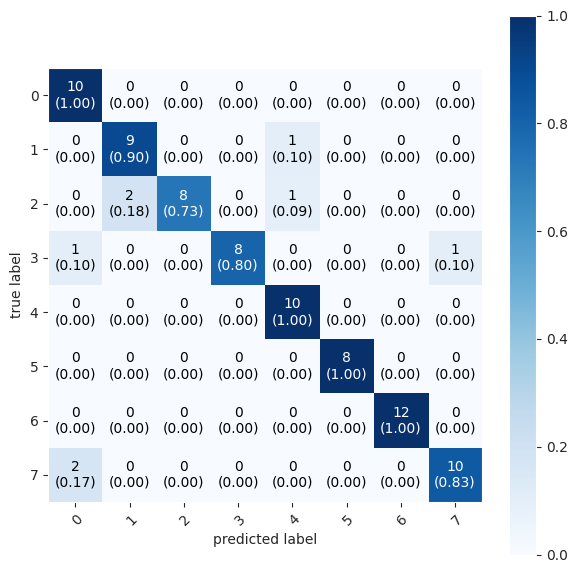

In [ ]:
# Compute confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using mlxtend's `plot_confusion_matrix`
figure, ax = plot_confusion_matrix(conf_mat=cm,
                                   show_absolute=True,
                                   show_normed=True,
                                   colorbar=True,
                                   class_names=class_names,
                                   figsize=(7, 7))
plt.show()

Width Multiplier= 1

Previous works

In [ ]:
# Directory for logging CSV data
logs_dir = os.path.join(save_dir, 'logs')
os.makedirs(logs_dir, exist_ok=True)

In [ ]:
# ModelCheckpoint: Save the best model weights
model_checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(weights_dir, 'ViT_weights-{epoch:02d}.h5'),
    save_weights_only=True,
    monitor='val_loss',  # Change to 'val_loss' if you want to monitor validation loss instead
    mode='min',  # Use 'min' if monitoring 'val_loss'
    save_best_only=True,
    verbose=1
)

In [ ]:
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1
)

In [ ]:
# CSVLogger: Log training data into a CSV file
csv_logger_callback = CSVLogger(
    os.path.join(logs_dir, 'training_log.csv')
)

In [ ]:
# EarlyStopping: Stop training when a monitored metric has stopped improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True
)


In [ ]:
# Combine all callbacks
callbacks = [
    model_checkpoint_callback,
    reduce_lr_callback,
    csv_logger_callback,
    early_stopping_callback,
    # Assuming metric_callback is defined elsewhere in your code
    # metric_callback
]

In [ ]:
0.# Now, you can use this `callbacks` list when fitting your model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/100
45/45 [==============================] - ETA: 0s - loss: 1.3675 - categorical_accuracy: 0.4937
Epoch 1: val_loss improved from inf to 1.59102, saving model to /content/drive/MyDrive/progress/Mobilenetv1_with_manual_data_aug_changed_batch-16/weights/ViT_weights-01.h5
45/45 [==============================] - 372s 8s/step - loss: 1.3675 - categorical_accuracy: 0.4937 - val_loss: 1.5910 - val_categorical_accuracy: 0.5250 - lr: 1.0000e-04
Epoch 2/100
45/45 [==============================] - ETA: 0s - loss: 0.6815 - categorical_accuracy: 0.7391
Epoch 2: val_loss improved from 1.59102 to 1.58635, saving model to /content/drive/MyDrive/progress/Mobilenetv1_with_manual_data_aug_changed_batch-16/weights/ViT_weights-02.h5
45/45 [==============================] - 46s 1s/step - loss: 0.6815 - categorical_accuracy: 0.7391 - val_loss: 1.5863 - val_categorical_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/100
45/45 [==============================] - ETA: 0s - loss: 0.5260 - categorical_accurac

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history, title):
    plt.title(title)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(0, 1)
    plt.legend(['train_accuracy', 'val_accuracy'], loc='best')
    plt.show()

def plot_loss(history, title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(0, 1)
    plt.legend(['train_loss', 'val_loss'], loc='best')
    plt.show()


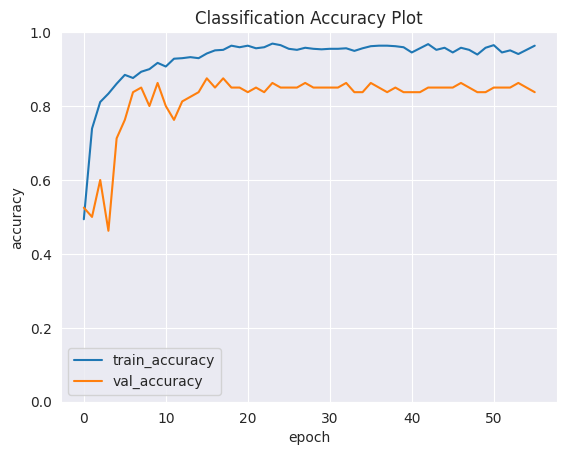

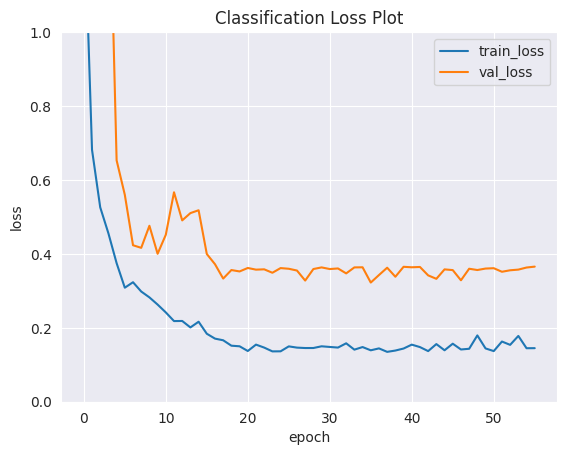

In [ ]:
plot_accuracy(history, 'Classification Accuracy Plot')
plot_loss(history, 'Classification Loss Plot')

In [ ]:

model.load_weights('/content/drive/MyDrive/progress/Mobilenetv1_with_manual_data_aug_changed_batch-16/weights/ViT_weights-16.h5')


In [ ]:
# Assume the model.predict() call returns a predictions object
predictions = model.predict(test_generator, verbose=0)

# Getting the index of the highest probability class per image
y_pred = np.argmax(predictions, axis=1)

# Getting the true labels per image
y_true = test_generator.classes

# Getting the class names (labels) from the generator
class_names = list(test_generator.class_indices.keys())

# Printing the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.89      0.80      0.84        10
           2       0.91      0.91      0.91        11
           3       0.91      1.00      0.95        10
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        12
           7       1.00      0.83      0.91        12

    accuracy                           0.94        83
   macro avg       0.94      0.94      0.94        83
weighted avg       0.94      0.94      0.94        83



In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

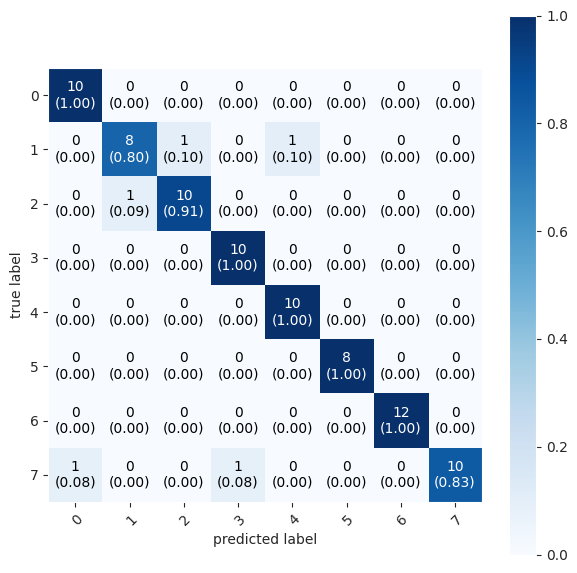

In [ ]:
# Compute confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using mlxtend's `plot_confusion_matrix`
figure, ax = plot_confusion_matrix(conf_mat=cm,
                                   show_absolute=True,
                                   show_normed=True,
                                   colorbar=True,
                                   class_names=class_names,
                                   figsize=(7, 7))
plt.show()